# California Housing

In this project, lets try to understand the relationship between different attributes of housing data.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('setup complete')

setup complete


In [49]:
housing_raw = pd.read_csv('../datasets/housing/housing.csv')
housing_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note there are many entries where the median total bedrooms is not available.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

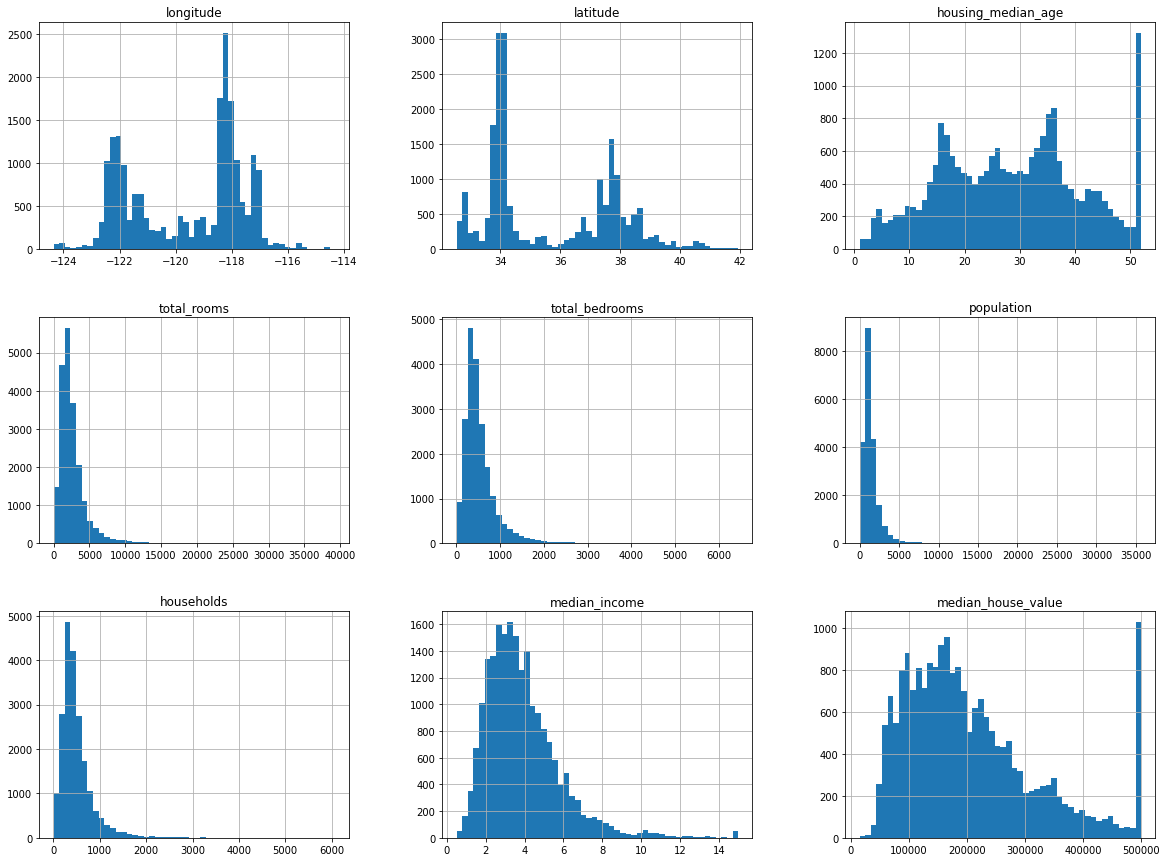

In [51]:
housing_raw.hist(bins=50, figsize=(20,15))

We can see that the age and house value are capped (50+ years and 500K respectively).  Median income is income/1000 dollars.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

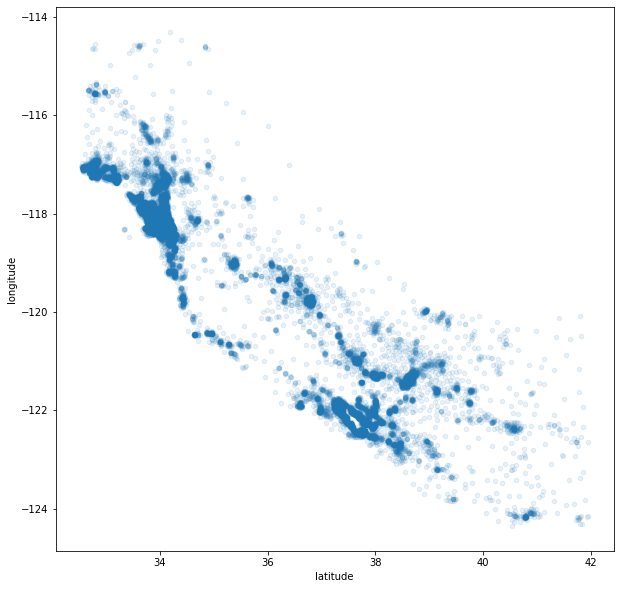

In [52]:
housing_raw[['latitude', 'longitude']].plot.scatter(x='latitude',y='longitude', alpha=0.1, figsize=(10,10))

We can use a scatter plot to see locations on a map.  We use alpha 0.1 so that areas where there are more points are darker.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

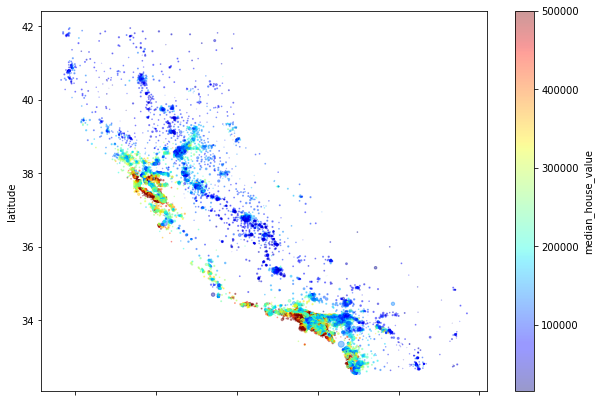

In [53]:
housing_raw.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_raw.population/1000,
                 c="median_house_value", cmap=plt.get_cmap("jet"), figsize=(10,7))

s parameter set the size of the dots based on the population.  Divided them by 1000 to make them smaller.  c changed the colour based on the value of the house.  Matplotlib has a number of [built in colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) - we used 'jet'

In [59]:
attrs = ['housing_median_age', 'total_rooms','median_income','median_house_value']

corr_matrix = housing_raw[attrs].corr()
corr_matrix

,housing_median_age,total_rooms,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.198050,0.134153
median_income,-0.119034,0.198050,1.000000,0.688075
median_house_value,0.105623,0.134153,0.688075,1.000000


<AxesSubplot:>

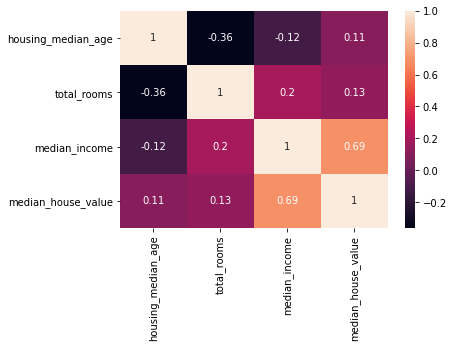

In [60]:
sns.heatmap(corr_matrix, annot=True)

It looks like income and house value have the highest correlation.  Lets do the pairwise plot we used in pokemon analysis!

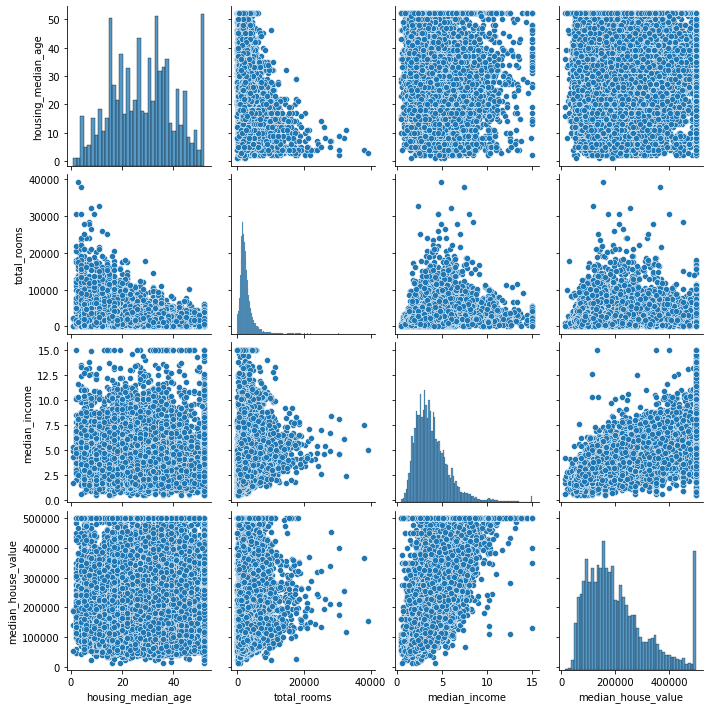

In [61]:
sns.pairplot(housing_raw[attrs])

Another way to plot this using pandas.plotting and matplotlib

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms'

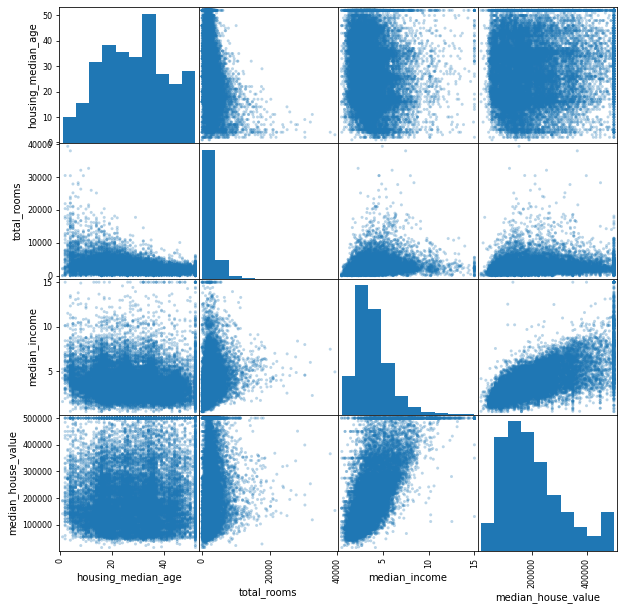

In [65]:
pd.plotting.scatter_matrix(housing_raw[attrs], figsize=(10,10), alpha=0.3)

We can see that there is some correlation between income and value

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

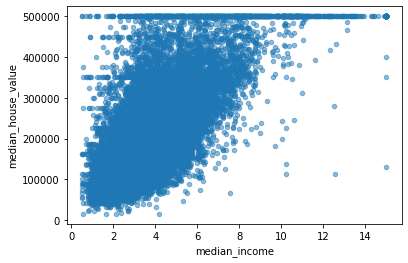

In [68]:
housing_raw.plot.scatter(x='median_income', y='median_house_value', alpha=0.5)

Now we have a pretty good understanding of the data!